In [2]:
# Функция для обрезки изображения до центральной части 128x128
def crop_center(img, crop_size=128):
    h, w = img.shape
    startx = w // 2 - (crop_size // 2)
    starty = h // 2 - (crop_size // 2)    
    return img[starty:starty + crop_size, startx:startx + crop_size]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Предсказанный класс: n=3, m=1


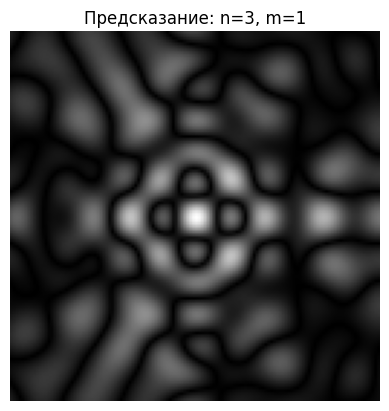

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Путь к модели
model_path = 'zernike_model.h5'

# Загрузка обученной модели
model = tf.keras.models.load_model(model_path)

# Путь к тестовому изображению
test_image_path = 'zernike_aberration_n5_m3_a10.00_b0.00_aug.png'  # Укажите путь к тестовому изображению

# Размер изображения (должен совпадать с тем, который использовался при обучении)
image_size = (128, 128)

# Функция для загрузки и подготовки изображения
def prepare_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем измерение batch size
    img_array /= 255.0  # Нормализация
    return img_array

# Загрузка и подготовка тестового изображения
test_image = prepare_image(test_image_path, image_size)

# Предсказание класса
predictions = model.predict(test_image)

# Получение класса с максимальной вероятностью
predicted_class = np.argmax(predictions, axis=1)

# Отображение предсказанного класса
class_labels = {0: 'n=2, m=2', 6: 'n=3, m=1', 2: 'n=3, m=3', 3: 'n=4, m=2', 
                4: 'n=4, m=4', 5: 'n=5, m=1', 1: 'n=5, m=3', 7: 'n=5, m=5'}

predicted_label = class_labels[predicted_class[0]]

print(f"Предсказанный класс: {predicted_label}")

# Отображение тестового изображения
img = load_img(test_image_path)
plt.imshow(img)
plt.title(f"Предсказание: {predicted_label}")
plt.axis('off')
plt.show()
